<a href="https://colab.research.google.com/github/akajai/Ajai---Machine-Deep-Learning/blob/main/Exercises/Exercise%202%20-%20Handwriting%20Recognition/Exercise2-Question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

## Exercise 2
In the course you learned how to do classification using Fashion MNIST, a data set containing items of clothing. There's another, similar dataset called MNIST which has items of handwriting -- the digits 0 through 9.

Write an MNIST classifier that trains to 99% accuracy or above, and does it without a fixed number of epochs -- i.e. you should stop training once you reach that level of accuracy.

Some notes:
1. It should succeed in less than 10 epochs, so it is okay to change epochs to 10, but nothing larger
2. When it reaches 99% or greater it should print out the string "Reached 99% accuracy so cancelling training!"
3. If you add any additional variables, make sure you use the same names as the ones used in the class

I've started the code for you below -- how would you finish it?




47040000 60000
7840000 10000


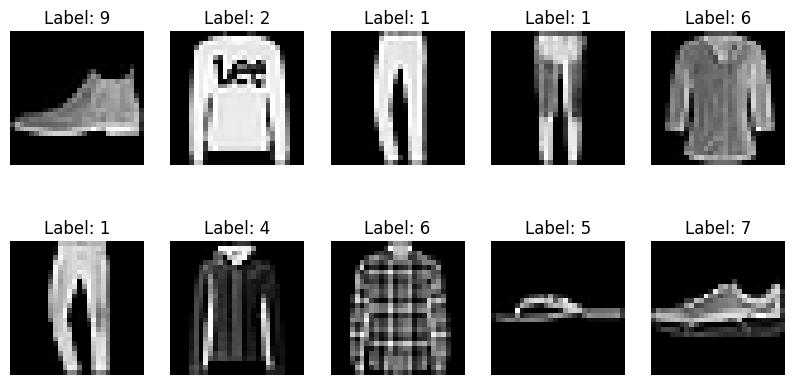

In [14]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

(test_x,test_y),(train_x,train_y) = keras.datasets.fashion_mnist.load_data()
print(test_x.size,test_y.size)
print(train_x.size,train_y.size)
# Display the first 10 images and their labels in grayscale
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(train_x[i], cmap='gray')
    plt.title(f"Label: {train_y[i]}")
    plt.axis('off')
plt.show()

Now, let's normalize the data and build the model.

In [5]:
# Normalize the training and test data
train_x = train_x / 255.0
test_x = test_x / 255.0

Next, define the model architecture.

In [12]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

# removed model.save('model.h5') as it was not requested
model.fit(train_x, train_y, epochs=10, callbacks=[callbacks], validation_data=(test_x, test_y))
new_var = model.evaluate(test_x, test_y)
print(new_var)


# Use expand_dims to add a batch dimension for prediction
import numpy as np
prediction = model.predict(np.expand_dims(test_x[0], axis=0))
print(prediction)

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.6914 - loss: 0.8900 - val_accuracy: 0.8265 - val_loss: 0.4989
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.8270 - loss: 0.4938 - val_accuracy: 0.8343 - val_loss: 0.4642
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.8459 - loss: 0.4365 - val_accuracy: 0.8510 - val_loss: 0.4141
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.8546 - loss: 0.4041 - val_accuracy: 0.8445 - val_loss: 0.4323
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.8666 - loss: 0.3721 - val_accuracy: 0.8539 - val_loss: 0.4097
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.8757 - loss: 0.3410 - val_accuracy: 0.8581 - val_loss: 0.3980
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.8782 - loss: 0.3407 - val_accuracy: 0.8506 - val_loss: 0.4096
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.8895 - loss: 0.2985 - val_accuracy: 0.865